In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate

In [2]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/simdata/input-noise/*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)

    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [3]:
num_epochs = 5000
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
0,0.001013,0.001005,-1.008475e-05,0.000997,0.000986,-0.000016,0.001008,0.001005,-7.643724e-07,0.001010,...,3,True,False,1.0,1,1,0.4,0.0,10,18
1,-0.013500,-0.006361,-1.008475e-05,-0.001159,-0.073844,-0.000016,-0.014253,0.025986,-7.643724e-07,0.021758,...,3,True,False,1.0,1,1,0.4,0.0,10,18
2,-0.016679,-0.012933,-1.008475e-05,0.002530,-0.106269,-0.000016,-0.019103,0.041870,-7.643724e-07,0.027634,...,3,True,False,1.0,1,1,0.4,0.0,10,18
3,-0.018533,-0.018258,-1.008475e-05,0.011869,-0.106136,-0.000016,-0.021561,0.054469,-7.643724e-07,0.030185,...,3,True,False,1.0,1,1,0.4,0.0,10,18
4,-0.019827,-0.023224,-1.008475e-05,0.019507,-0.095000,-0.000016,-0.022423,0.066438,-7.643724e-07,0.030687,...,3,True,False,1.0,1,1,0.4,0.0,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.006577,-0.047183,3.719089e-07,0.181023,0.006922,0.000007,-0.057777,0.253474,2.838189e-07,-0.069465,...,3,True,False,1.0,9,1,0.4,0.0,10,18
246,0.006649,-0.047755,3.719089e-07,0.180196,0.008322,0.000007,-0.057742,0.255321,2.838189e-07,-0.071715,...,3,True,False,1.0,9,1,0.4,0.0,10,18
247,0.006786,-0.048251,3.719089e-07,0.179306,0.009214,0.000007,-0.057652,0.257309,2.838189e-07,-0.073805,...,3,True,False,1.0,9,1,0.4,0.0,10,18
248,0.007064,-0.048443,3.719089e-07,0.177741,0.007300,0.000007,-0.057587,0.259423,2.838189e-07,-0.075085,...,3,True,False,1.0,9,1,0.4,0.0,10,18


In [4]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

['epoch', 'loss', 'r2_score', 'num_exps', 'num_epochs', 'trials_per_block', 'log_interval', 'num_blocks', 'log_expdata', 'use_experimental_data', 'neural_recording_sparsity', 'jobid', 'input_firing_mean', 'input_noise', 'l1_regularization', 'moving_avg_window', 'trainable_coeffs']


In [5]:
df.drop(df[df["num_epochs"] != num_epochs].index, inplace=True)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["trials_per_block"] = df["trials_per_block"].astype(int)

In [6]:
np.sort(df["jobid"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [7]:
df.dtypes

A_000                        float64
A_001                        float64
A_002                        float64
A_010                        float64
A_011                        float64
A_012                        float64
A_020                        float64
A_021                        float64
A_022                        float64
A_100                        float64
A_101                        float64
A_102                        float64
A_110                        float64
A_111                        float64
A_112                        float64
A_120                        float64
A_121                        float64
A_122                        float64
A_200                        float64
A_201                        float64
A_202                        float64
A_210                        float64
A_211                        float64
A_212                        float64
A_220                        float64
A_221                        float64
A_222                        float64
e

In [26]:
df_subset = df.loc[(df['num_epochs'] == num_epochs) & (df['epoch'] == 4900) & ((df['input_noise'] == 0.0) | (df['input_noise'] == 0.2) | (df['input_noise'] == 1.))]
num_exps = len(df_subset)
df_subset.head(5)

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
99,-0.020070,-0.016976,-0.000010,0.237020,-0.300213,-0.000016,-0.036923,0.078650,-7.643724e-07,0.025084,...,3,True,False,1.0,1,1,0.0,0.0,10,18
199,-0.005981,-0.065967,-0.000010,0.077469,0.421422,-0.000016,0.059138,0.192346,-7.643724e-07,0.025678,...,3,True,False,1.0,1,1,1.0,0.0,10,18
249,0.032172,0.001475,-0.000010,0.310784,-0.294418,-0.000016,-0.256919,0.042929,-7.643724e-07,0.026848,...,3,True,False,1.0,1,1,0.2,0.0,10,18
49,0.032596,-0.040681,0.000008,0.109463,-0.405059,-0.000002,-0.114648,0.141154,-1.883750e-05,0.000528,...,3,True,False,1.0,10,1,1.0,0.0,10,18
199,-0.023550,-0.001234,0.000008,-0.248329,0.031925,-0.000002,0.248887,-0.013060,-1.883750e-05,0.069407,...,3,True,False,1.0,10,1,0.0,0.0,10,18


In [27]:
# remove all second order weight terms!
for coeff in coeffs:
    if coeff[-1] == "2":
        df_subset = df_subset.drop(coeff, axis=1)

In [28]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})
melted_df

,epoch,loss,r2_score,num_exps,num_epochs,trials_per_block,log_interval,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,coeff_name,coeff_val
0,4900,0.565948,-114.698436,1,5000,80,100,3,True,False,1.0,1,1,0.0,0.0,10,18,A_000,-0.020070
1,4900,0.678140,-2.214379,1,5000,80,100,3,True,False,1.0,1,1,1.0,0.0,10,18,A_000,-0.005981
2,4900,0.566122,0.597498,1,5000,80,100,3,True,False,1.0,1,1,0.2,0.0,10,18,A_000,0.032172
3,4900,0.678885,-7.699948,1,5000,80,100,3,True,False,1.0,10,1,1.0,0.0,10,18,A_000,0.032596
4,4900,0.606977,-0.059826,1,5000,80,100,3,True,False,1.0,10,1,0.0,0.0,10,18,A_000,-0.023550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,4900,0.681235,-0.403222,1,5000,80,100,3,True,False,1.0,8,1,1.0,0.0,10,18,A_221,0.010369
950,4900,0.658091,-2.514097,1,5000,80,100,3,True,False,1.0,8,1,0.2,0.0,10,18,A_221,-0.050733
951,4900,0.567500,-0.893559,1,5000,80,100,3,True,False,1.0,9,1,0.0,0.0,10,18,A_221,0.020941
952,4900,0.674530,-4.667701,1,5000,80,100,3,True,False,1.0,9,1,1.0,0.0,10,18,A_221,0.013192


<Figure size 432x288 with 0 Axes>

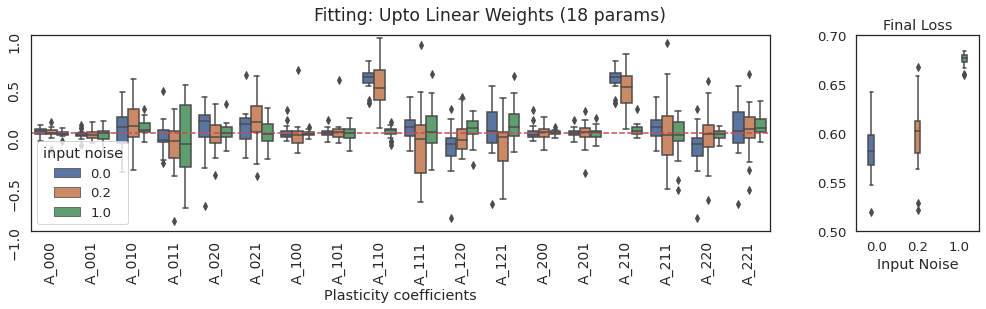

In [30]:
sns.set(font_scale = 1.2)
sns.set_style("white")
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(17, 4), width_ratios=[6,1])

fig.suptitle('Fitting: Upto Linear Weights (18 params)', fontsize="large")

axes[0].axhline(y=0, color='r', linestyle='--')
sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", hue="input_noise", ax=axes[0])
axes[0].set_xlabel("Plasticity coefficients")
axes[0].set_ylabel(None)
axes[0].set_ylim([-1, 1])
axes[0].tick_params(labelrotation=90, which="major", labelsize=14, color="black", direction='out')
axes[0].legend(title='input noise')

axes[1].set_title('Final Loss')
sns.boxplot(data=df_subset, x="input_noise", y="loss", hue="input_noise", width=0.4, ax=axes[1])
axes[1].set_xlabel("Input Noise")
axes[1].set_ylabel(None)
axes[1].set_ylim([0.50, 0.7])

axes[1].get_legend().remove()
fig.subplots_adjust(bottom=0.2)

plt.savefig(f"input-noise.png", dpi=500)